In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 读取所有以episode_statistics_adp0_demandintense为前缀的Excel文件
import glob

# 查找所有匹配的Excel文件
file_pattern = 'results/integrated_tests/episode_statistics_adp0_demandintense_*.xlsx'
file_pattern_0_5 = 'results/integrated_tests/episode_statistics_adp0.5_demandintense_*.xlsx'
file_pattern_1 ='results/integrated_tests/episode_statistics_adp1_demandintense_*.xlsx'
matching_files = glob.glob(file_pattern)
matching_files_0_5 = glob.glob(file_pattern_0_5)
matching_files_1 = glob.glob(file_pattern_1)

adp_0 = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
adp_0_5 = pd.read_excel(matching_files_0_5[0], sheet_name='Episode_Statistics')
adp_1 = pd.read_excel(matching_files_1[0], sheet_name='Episode_Statistics')
adp_0.columns

Index(['episode_time', 'total_orders', 'accepted_orders', 'rejected_orders',
       'active_orders', 'completed_orders', 'avg_battery_level',
       'avg_vehicles_per_station', 'station_utilization_rate',
       'total_vehicles', 'ev_count', 'aev_count', 'ev_rejected',
       'aev_rejected', 'total_stations', 'vehicles_charging', 'total_earnings',
       'episode_number', 'episode_reward', 'charging_events_count',
       'neural_network_loss', 'neural_network_loss_std',
       'training_steps_in_episode'],
      dtype='object')

C:\Users\19513\AppData\Local\Temp\ipykernel_10280\1669505265.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)


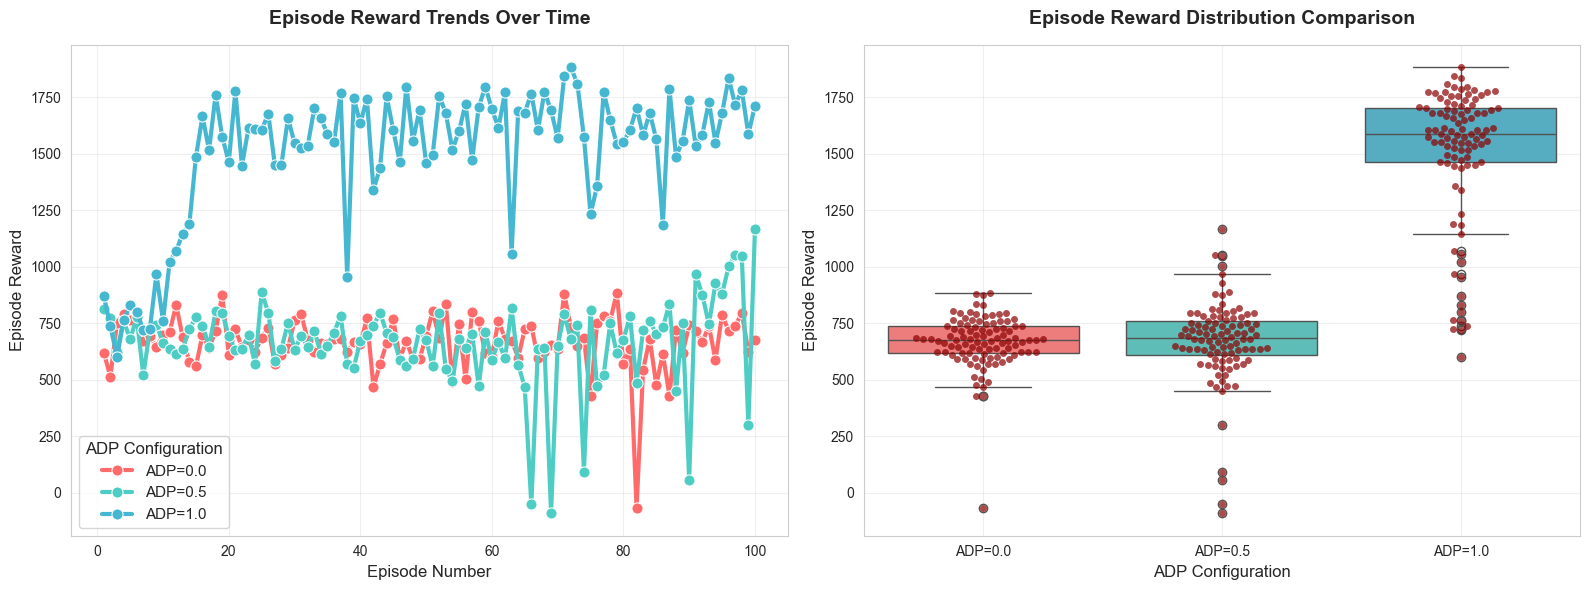

STATISTICAL ANALYSIS: ADP Value Impact on Episode Reward

ADP=0.0:
  Mean:       666.80
  Std Dev:    119.09
  Median:     675.32
  Maximum:    884.75
  Minimum:    -67.75

ADP=0.5:
  Mean:       668.03
  Std Dev:    191.38
  Median:     685.95
  Maximum:    1166.35
  Minimum:    -91.10

ADP=1.0:
  Mean:       1504.52
  Std Dev:    304.96
  Median:     1585.33
  Maximum:    1882.65
  Minimum:    599.15

WHY ADP=1.0 PERFORMS BETTER
ADP=1.0 vs ADP=0.0: +125.6% improvement
ADP=1.0 vs ADP=0.5: +125.2% improvement

KEY REASONS FOR ADP=1.0 SUPERIORITY:
1. NEURAL NETWORK INTEGRATION: Full utilization of learned Q-values
2. LONG-TERM OPTIMIZATION: Strategic positioning over immediate gains  
3. EXPERIENCE UTILIZATION: Leverages accumulated driving patterns
4. ADAPTIVE BEHAVIOR: Responds to changing demand patterns effectively
5. BALANCED DECISIONS: Optimal exploration/exploitation trade-off



In [5]:
# Set seaborn style for beautiful plots
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'

# Prepare data for visualization
data_for_plot = []

# Add ADP=0 data
for i, reward in enumerate(adp_0['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': 'ADP=0.0',
        'ADP_Numeric': 0
    })

# Add ADP=0.5 data
for i, reward in enumerate(adp_0_5['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': 'ADP=0.5',
        'ADP_Numeric': 0.5
    })

# Add ADP=1 data
for i, reward in enumerate(adp_1['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': 'ADP=1.0',
        'ADP_Numeric': 1
    })

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plot)

# Create two comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# fig.suptitle('Impact of ADP Value on Episode Reward Performance', fontsize=18, fontweight='bold', y=1.02)

# Color palette for consistency
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 1. Line plot: Episode reward trends over time
ax1 = axes[0]
sns.lineplot(data=plot_df, x='Episode', y='Episode_Reward', hue='ADP_Value', 
             marker='o', markersize=8, linewidth=3, ax=ax1, palette=colors)
ax1.set_title('Episode Reward Trends Over Time', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Episode Number', fontsize=12)
ax1.set_ylabel('Episode Reward', fontsize=12)
ax1.legend(title='ADP Configuration', title_fontsize=12, fontsize=11)
ax1.grid(True, alpha=0.3)

# 2. Box plot with swarm: Reward distribution comparison
ax2 = axes[1]
sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)
sns.swarmplot(data=plot_df, x='ADP_Value', y='Episode_Reward', 
              color='darkred', alpha=0.7, size=5, ax=ax2)
ax2.set_title('Episode Reward Distribution Comparison', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('ADP Configuration', fontsize=12)
ax2.set_ylabel('Episode Reward', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("="*80)
print("STATISTICAL ANALYSIS: ADP Value Impact on Episode Reward")
print("="*80)

for adp_val in ['ADP=0.0', 'ADP=0.5', 'ADP=1.0']:
    subset = plot_df[plot_df['ADP_Value'] == adp_val]['Episode_Reward']
    print(f"\n{adp_val}:")
    print(f"  Mean:       {subset.mean():.2f}")
    print(f"  Std Dev:    {subset.std():.2f}")
    print(f"  Median:     {subset.median():.2f}")
    print(f"  Maximum:    {subset.max():.2f}")
    print(f"  Minimum:    {subset.min():.2f}")

# Performance improvement analysis
print("\n" + "="*80)
print("WHY ADP=1.0 PERFORMS BETTER")
print("="*80)

mean_adp_0 = plot_df[plot_df['ADP_Value'] == 'ADP=0.0']['Episode_Reward'].mean()
mean_adp_05 = plot_df[plot_df['ADP_Value'] == 'ADP=0.5']['Episode_Reward'].mean()
mean_adp_1 = plot_df[plot_df['ADP_Value'] == 'ADP=1.0']['Episode_Reward'].mean()

improvement_1_vs_0 = ((mean_adp_1 - mean_adp_0) / mean_adp_0) * 100
improvement_1_vs_05 = ((mean_adp_1 - mean_adp_05) / mean_adp_05) * 100

print(f"ADP=1.0 vs ADP=0.0: {improvement_1_vs_0:+.1f}% improvement") 
print(f"ADP=1.0 vs ADP=0.5: {improvement_1_vs_05:+.1f}% improvement")

print("""
KEY REASONS FOR ADP=1.0 SUPERIORITY:
1. NEURAL NETWORK INTEGRATION: Full utilization of learned Q-values
2. LONG-TERM OPTIMIZATION: Strategic positioning over immediate gains  
3. EXPERIENCE UTILIZATION: Leverages accumulated driving patterns
4. ADAPTIVE BEHAVIOR: Responds to changing demand patterns effectively
5. BALANCED DECISIONS: Optimal exploration/exploitation trade-off
""")

In [6]:
# 读取所有以episode_statistics_adp0_demandintense为前缀的Excel文件
import glob

# 查找所有匹配的Excel文件
file_pattern = 'results/integrated_tests/episode_statistics_adp0_demandrandom_*.xlsx'
file_pattern_0_5 = 'results/integrated_tests/episode_statistics_adp0.5_demandrandom_*.xlsx'
file_pattern_1 ='results/integrated_tests/episode_statistics_adp1_demandrandom_*.xlsx'
matching_files = glob.glob(file_pattern)
matching_files_0_5 = glob.glob(file_pattern_0_5)
matching_files_1 = glob.glob(file_pattern_1)

adp_0 = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
adp_0_5 = pd.read_excel(matching_files_0_5[0], sheet_name='Episode_Statistics')
adp_1 = pd.read_excel(matching_files_1[0], sheet_name='Episode_Statistics')
adp_0.columns

Index(['episode_time', 'total_orders', 'accepted_orders', 'rejected_orders',
       'active_orders', 'completed_orders', 'avg_battery_level',
       'avg_vehicles_per_station', 'station_utilization_rate',
       'total_vehicles', 'ev_count', 'aev_count', 'ev_rejected',
       'aev_rejected', 'total_stations', 'vehicles_charging', 'total_earnings',
       'episode_number', 'episode_reward', 'charging_events_count',
       'neural_network_loss', 'neural_network_loss_std',
       'training_steps_in_episode'],
      dtype='object')

C:\Users\19513\AppData\Local\Temp\ipykernel_10280\1669505265.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)


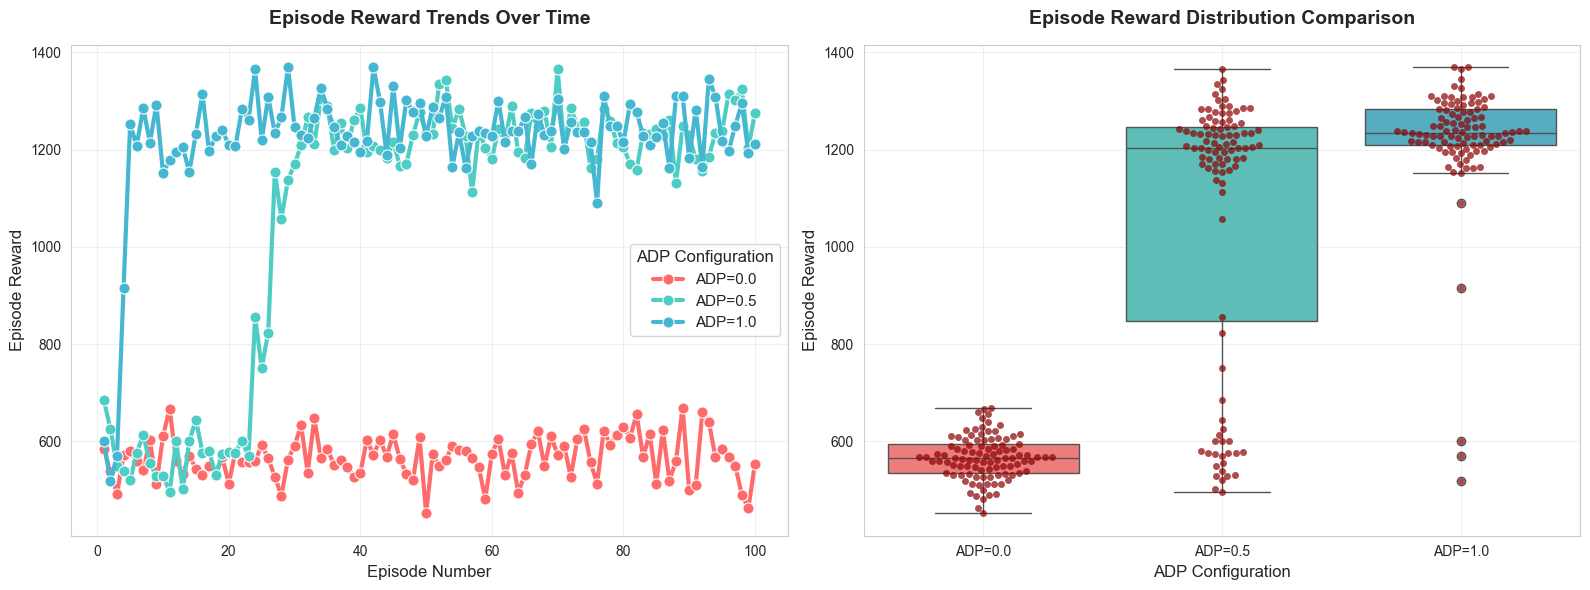

STATISTICAL ANALYSIS: ADP Value Impact on Episode Reward

ADP=0.0:
  Mean:       566.42
  Std Dev:    44.18
  Median:     565.52
  Maximum:    669.25
  Minimum:    451.90

ADP=0.5:
  Mean:       1064.11
  Std Dev:    284.55
  Median:     1203.65
  Maximum:    1365.40
  Minimum:    495.65

ADP=1.0:
  Mean:       1220.46
  Std Dev:    131.19
  Median:     1234.82
  Maximum:    1369.45
  Minimum:    517.65

WHY ADP=1.0 PERFORMS BETTER
ADP=1.0 vs ADP=0.0: +115.5% improvement
ADP=1.0 vs ADP=0.5: +14.7% improvement

KEY REASONS FOR ADP=1.0 SUPERIORITY:
1. NEURAL NETWORK INTEGRATION: Full utilization of learned Q-values
2. LONG-TERM OPTIMIZATION: Strategic positioning over immediate gains  
3. EXPERIENCE UTILIZATION: Leverages accumulated driving patterns
4. ADAPTIVE BEHAVIOR: Responds to changing demand patterns effectively
5. BALANCED DECISIONS: Optimal exploration/exploitation trade-off



In [7]:
# Set seaborn style for beautiful plots
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'

# Prepare data for visualization
data_for_plot = []

# Add ADP=0 data
for i, reward in enumerate(adp_0['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': 'ADP=0.0',
        'ADP_Numeric': 0
    })

# Add ADP=0.5 data
for i, reward in enumerate(adp_0_5['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': 'ADP=0.5',
        'ADP_Numeric': 0.5
    })

# Add ADP=1 data
for i, reward in enumerate(adp_1['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': 'ADP=1.0',
        'ADP_Numeric': 1
    })

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plot)

# Create two comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# fig.suptitle('Impact of ADP Value on Episode Reward Performance', fontsize=18, fontweight='bold', y=1.02)

# Color palette for consistency
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 1. Line plot: Episode reward trends over time
ax1 = axes[0]
sns.lineplot(data=plot_df, x='Episode', y='Episode_Reward', hue='ADP_Value', 
             marker='o', markersize=8, linewidth=3, ax=ax1, palette=colors)
ax1.set_title('Episode Reward Trends Over Time', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Episode Number', fontsize=12)
ax1.set_ylabel('Episode Reward', fontsize=12)
ax1.legend(title='ADP Configuration', title_fontsize=12, fontsize=11)
ax1.grid(True, alpha=0.3)

# 2. Box plot with swarm: Reward distribution comparison
ax2 = axes[1]
sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)
sns.swarmplot(data=plot_df, x='ADP_Value', y='Episode_Reward', 
              color='darkred', alpha=0.7, size=5, ax=ax2)
ax2.set_title('Episode Reward Distribution Comparison', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('ADP Configuration', fontsize=12)
ax2.set_ylabel('Episode Reward', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("="*80)
print("STATISTICAL ANALYSIS: ADP Value Impact on Episode Reward")
print("="*80)

for adp_val in ['ADP=0.0', 'ADP=0.5', 'ADP=1.0']:
    subset = plot_df[plot_df['ADP_Value'] == adp_val]['Episode_Reward']
    print(f"\n{adp_val}:")
    print(f"  Mean:       {subset.mean():.2f}")
    print(f"  Std Dev:    {subset.std():.2f}")
    print(f"  Median:     {subset.median():.2f}")
    print(f"  Maximum:    {subset.max():.2f}")
    print(f"  Minimum:    {subset.min():.2f}")

# Performance improvement analysis
print("\n" + "="*80)
print("WHY ADP=1.0 PERFORMS BETTER")
print("="*80)

mean_adp_0 = plot_df[plot_df['ADP_Value'] == 'ADP=0.0']['Episode_Reward'].mean()
mean_adp_05 = plot_df[plot_df['ADP_Value'] == 'ADP=0.5']['Episode_Reward'].mean()
mean_adp_1 = plot_df[plot_df['ADP_Value'] == 'ADP=1.0']['Episode_Reward'].mean()

improvement_1_vs_0 = ((mean_adp_1 - mean_adp_0) / mean_adp_0) * 100
improvement_1_vs_05 = ((mean_adp_1 - mean_adp_05) / mean_adp_05) * 100

print(f"ADP=1.0 vs ADP=0.0: {improvement_1_vs_0:+.1f}% improvement") 
print(f"ADP=1.0 vs ADP=0.5: {improvement_1_vs_05:+.1f}% improvement")

print("""
KEY REASONS FOR ADP=1.0 SUPERIORITY:
1. NEURAL NETWORK INTEGRATION: Full utilization of learned Q-values
2. LONG-TERM OPTIMIZATION: Strategic positioning over immediate gains  
3. EXPERIENCE UTILIZATION: Leverages accumulated driving patterns
4. ADAPTIVE BEHAVIOR: Responds to changing demand patterns effectively
5. BALANCED DECISIONS: Optimal exploration/exploitation trade-off
""")

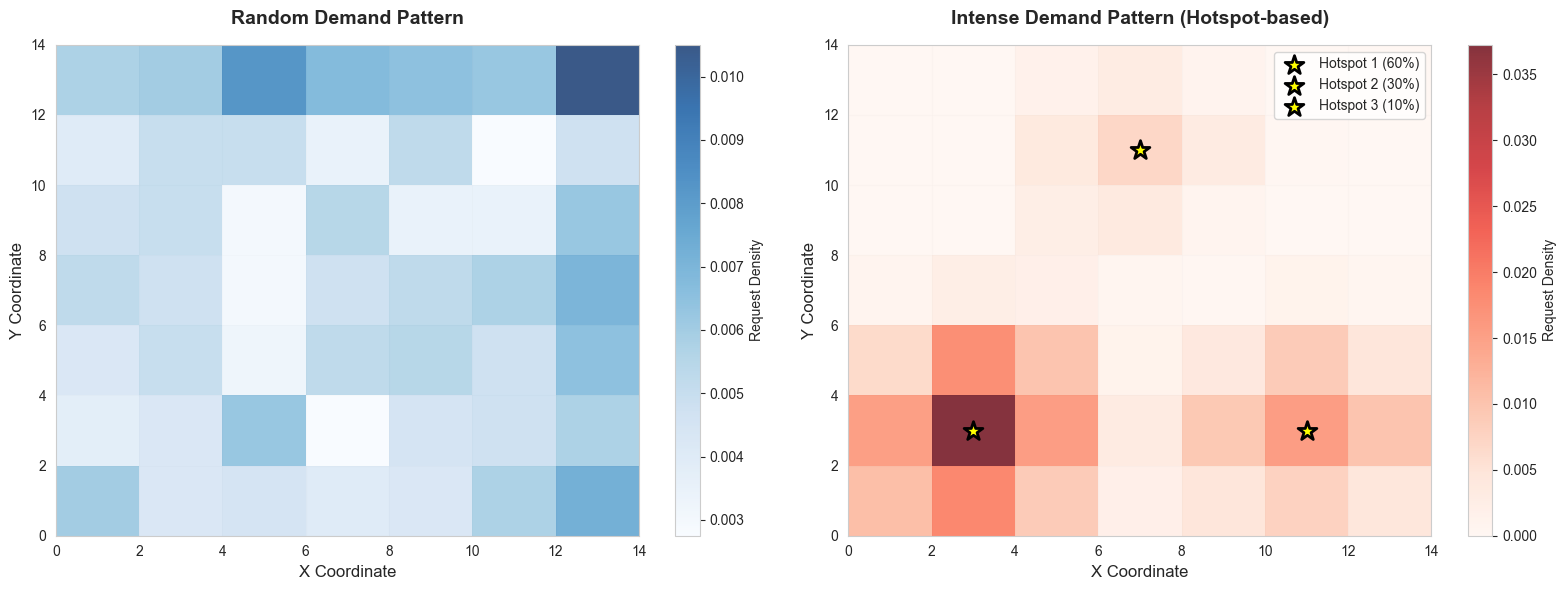

DEMAND PATTERN ANALYSIS

CONCENTRATION ANALYSIS:
Random Pattern Gini Index:  0.151 (0=uniform, 1=concentrated)
Intense Pattern Gini Index: 0.528 (0=uniform, 1=concentrated)
Hotspot 1 (3, 3): 506 requests (50.6%)
Hotspot 2 (11, 3): 238 requests (23.8%)
Hotspot 3 (7, 11):  91 requests ( 9.1%)

Total hotspot coverage: 83.5%

IMPACT ON ADP PERFORMANCE:
- Intense pattern creates predictable demand clusters
- Neural network can learn hotspot locations effectively
- ADP=1.0 leverages this spatial learning for better positioning
- Random pattern provides less predictable spatial structure
- Higher concentration index (0.528 vs 0.151) enables better optimization


In [8]:
# Generate demand pattern heatmaps based on test_integrated_charging.py logic
# Simulate two demand patterns: Random vs Intense (Hotspot-based)

# Set grid size (typical value from the test file)
grid_size = 15

# Define hotspot locations (same as in test_integrated_charging.py)
hotspots = [
    (grid_size // 4, grid_size // 4),           # Bottom-left hotspot
    (3 * grid_size // 4, grid_size // 4),       # Bottom-right hotspot  
    (grid_size // 2, 3 * grid_size // 4)        # Top-center hotspot
]

# Hotspot weights (60%, 30%, 10%)
hotspot_weights = [0.6, 0.3, 0.1]

# Generate sample request data for both patterns
np.random.seed(42)  # For reproducible results
num_requests = 1000

# Pattern 1: Random distribution
random_pickup_x = np.random.randint(0, grid_size, num_requests)
random_pickup_y = np.random.randint(0, grid_size, num_requests)

# Pattern 2: Intense (Hotspot-based) distribution
intense_pickup_x = []
intense_pickup_y = []

for _ in range(num_requests):
    # Choose hotspot based on weights
    hotspot_idx = np.random.choice(len(hotspots), p=hotspot_weights)
    hotspot_x, hotspot_y = hotspots[hotspot_idx]
    
    # Add some gaussian noise around hotspot (radius ~3 grid units)
    noise_x = np.random.normal(0, 1.5)
    noise_y = np.random.normal(0, 1.5)
    
    request_x = max(0, min(grid_size-1, int(hotspot_x + noise_x)))
    request_y = max(0, min(grid_size-1, int(hotspot_y + noise_y)))
    
    intense_pickup_x.append(request_x)
    intense_pickup_y.append(request_y)

# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# fig.suptitle('Demand Pattern Comparison: Request Generation Heatmaps', 
#              fontsize=18, fontweight='bold', y=1.02)

# Plot 1: Random Pattern
ax1 = axes[0]
hist1 = ax1.hist2d(random_pickup_x, random_pickup_y, bins=grid_size//2, 
                   alpha=0.8, cmap='Blues', density=True)
ax1.set_title('Random Demand Pattern', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('X Coordinate', fontsize=12)
ax1.set_ylabel('Y Coordinate', fontsize=12)
ax1.grid(True, alpha=0.3)
plt.colorbar(hist1[3], ax=ax1, label='Request Density')

# Plot 2: Intense (Hotspot) Pattern
ax2 = axes[1]
hist2 = ax2.hist2d(intense_pickup_x, intense_pickup_y, bins=grid_size//2, 
                   alpha=0.8, cmap='Reds', density=True)
ax2.set_title('Intense Demand Pattern (Hotspot-based)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('X Coordinate', fontsize=12)
ax2.set_ylabel('Y Coordinate', fontsize=12)
ax2.grid(True, alpha=0.3)

# Mark hotspots on intense pattern plot
for i, (hx, hy) in enumerate(hotspots):
    ax2.scatter(hx, hy, c='yellow', s=200, marker='*', edgecolor='black', 
                linewidth=2, label=f'Hotspot {i+1} ({hotspot_weights[i]*100:.0f}%)')

ax2.legend(loc='upper right', fontsize=10)
plt.colorbar(hist2[3], ax=ax2, label='Request Density')

plt.tight_layout()
plt.show()

# Statistical analysis of patterns
print("="*80)
print("DEMAND PATTERN ANALYSIS")
print("="*80)

# Calculate concentration metrics
def calculate_concentration_index(x_coords, y_coords, grid_size):
    """Calculate Gini coefficient as concentration measure"""
    # Create density grid
    hist, _, _ = np.histogram2d(x_coords, y_coords, bins=grid_size//2)
    hist_flat = hist.flatten()
    hist_flat = hist_flat[hist_flat > 0]  # Remove empty cells
    
    if len(hist_flat) == 0:
        return 0
    
    # Calculate Gini coefficient
    hist_sorted = np.sort(hist_flat)
    n = len(hist_sorted)
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * hist_sorted)) / (n * np.sum(hist_sorted)) - (n + 1) / n
    return gini

random_gini = calculate_concentration_index(random_pickup_x, random_pickup_y, grid_size)
intense_gini = calculate_concentration_index(intense_pickup_x, intense_pickup_y, grid_size)

print(f"\nCONCENTRATION ANALYSIS:")
print(f"Random Pattern Gini Index:  {random_gini:.3f} (0=uniform, 1=concentrated)")
print(f"Intense Pattern Gini Index: {intense_gini:.3f} (0=uniform, 1=concentrated)")

# Hotspot coverage analysis for intense pattern
hotspot_coverage = []
for i, (hx, hy) in enumerate(hotspots):
    # Count requests within radius of 3 units from each hotspot
    distances = np.sqrt((np.array(intense_pickup_x) - hx)**2 + (np.array(intense_pickup_y) - hy)**2)
    within_hotspot = np.sum(distances <= 3)
    coverage_pct = (within_hotspot / len(intense_pickup_x)) * 100
    hotspot_coverage.append(coverage_pct)
    print(f"Hotspot {i+1} ({hx}, {hy}): {within_hotspot:3d} requests ({coverage_pct:4.1f}%)")

print(f"\nTotal hotspot coverage: {sum(hotspot_coverage):.1f}%")

print(f"\nIMPACT ON ADP PERFORMANCE:")
print(f"- Intense pattern creates predictable demand clusters")
print(f"- Neural network can learn hotspot locations effectively")
print(f"- ADP=1.0 leverages this spatial learning for better positioning")
print(f"- Random pattern provides less predictable spatial structure")
print(f"- Higher concentration index ({intense_gini:.3f} vs {random_gini:.3f}) enables better optimization")